<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/NguyenHoangPhuc_20146417(GfrACE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7cb1d87678c97e144a07d76f2c65658fc8d893b3efd2d918926f71db49e02454
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


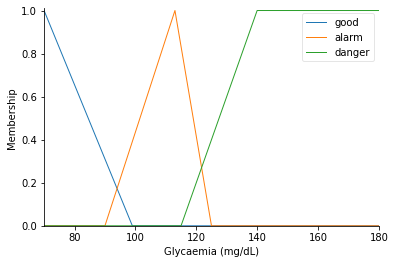

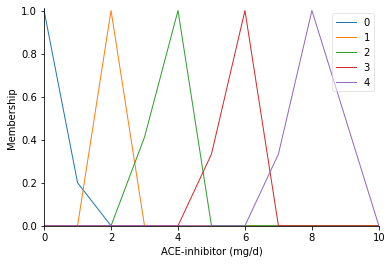

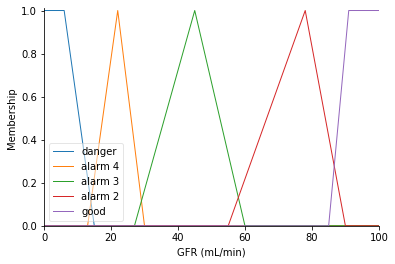

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Glycaemia_Level = ctrl.Antecedent(np.arange(70,180.1,1),'Glycaemia (mg/dL)')
DiffACE = ctrl.Antecedent(np.arange(0,10.1,1),'ACE‐inhibitor (mg/d)')
GFR_Level = ctrl.Consequent(np.arange(0,100.1,1),'GFR (mL/min)')

Glycaemia_Level['good'] = fuzz.trimf(Glycaemia_Level.universe,[70,70,99])
Glycaemia_Level['alarm'] = fuzz.trimf(Glycaemia_Level.universe,[90,113,125])
Glycaemia_Level['danger'] = fuzz.trapmf(Glycaemia_Level.universe,[115,140,180,180])

DiffACE['0'] = fuzz.trimf(DiffACE.universe,[0,0,1.25])
DiffACE['1'] = fuzz.trimf(DiffACE.universe,[1,2,2.5])
DiffACE['2'] = fuzz.trimf(DiffACE.universe,[2.3,4,5])
DiffACE['3'] = fuzz.trimf(DiffACE.universe,[4.5,6,7])
DiffACE['4'] = fuzz.trimf(DiffACE.universe,[6.5,8,10])


GFR_Level['danger'] = fuzz.trapmf(GFR_Level.universe,[0,0,6,15])
GFR_Level['alarm 4'] = fuzz.trimf(GFR_Level.universe,[13,22,30])
GFR_Level['alarm 3'] = fuzz.trimf(GFR_Level.universe,[27,45,60])
GFR_Level['alarm 2'] = fuzz.trimf(GFR_Level.universe,[55,78,90])
GFR_Level['good'] = fuzz.trapmf(GFR_Level.universe,[85,91,100,100])

Glycaemia_Level.view()
DiffACE.view()
GFR_Level.view()


In [ ]:
# follow table 4:
rule1 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['2'], GFR_Level['alarm 3'])
rule2 = ctrl.Rule(Glycaemia_Level['alarm'] & DiffACE['2'], GFR_Level['alarm 3'])
rule3 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['1'], GFR_Level['alarm 2'])
rule4 = ctrl.Rule(Glycaemia_Level['alarm'] & DiffACE['1'], GFR_Level['alarm 2'])
rule5 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['3'], GFR_Level['alarm 3'])
rule6 = ctrl.Rule(Glycaemia_Level['danger'] & DiffACE['3'], GFR_Level['alarm 4'])
rule7 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['4'], GFR_Level['alarm 2'])
rule8 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['0'], GFR_Level['good'])
rule9 = ctrl.Rule(Glycaemia_Level['danger'] & DiffACE['4'], GFR_Level['danger'])

GFR_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

GFR = ctrl.ControlSystemSimulation(GFR_ctrl)

7.059574468085107


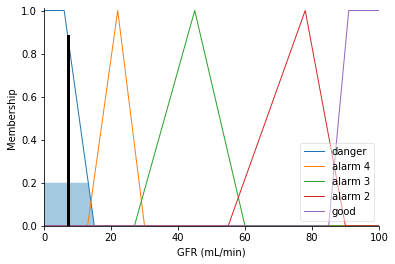

In [ ]:
GFR.input['Glycaemia (mg/dL)'] = 120
GFR.input['ACE‐inhibitor (mg/d)'] = 8
GFR.compute()
print(GFR.output['GFR (mL/min)'])
GFR_Level.view(sim=GFR)